<a href="https://colab.research.google.com/github/julife12/Colab_FIA/blob/main/Numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importamos lo necesario para crear la red
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

# Importamos unos paquetes de sklearn para comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Text(0.5, 1.0, 'Label: 9')

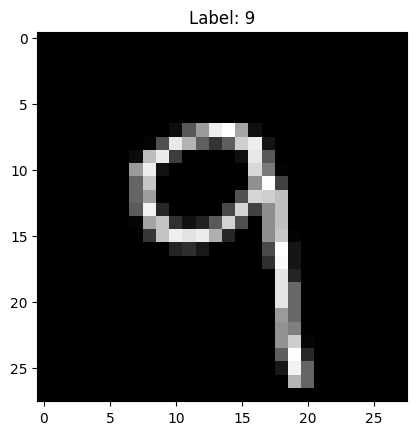

In [3]:
sample = np.random.randint(0,60000)
plt.imshow(xtrain[sample], cmap=plt.cm.gray)
plt.title('Label: ' + str(ytrain[sample]))

In [4]:
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

if backend.image_data_format() == 'channels_first':
    xtrain = xtrain.reshape(xtrain.shape[0], 1, 28, 28)
    xtest = xtest.reshape(xtest.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
    xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

print(xtrain.shape)
print(input_shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [5]:
ytrain = keras.utils.to_categorical(ytrain, 10)
print(ytrain)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [6]:
def build_model():
  model = Sequential()

  model.add(Conv2D(3,kernel_size=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(3, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(80, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(5, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer = 'adam',
                metrics=['accuracy'])
  return model

In [7]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 3)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 3)         84        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 3)          0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 3)           0

In [18]:
model.fit(xtrain, ytrain, batch_size=1000, epochs=10, verbose=1,
          validation_split=0.15)

Epoch 1/10
51/51 [==============================] - 15s 286ms/step - loss: 1.6351 - accuracy: 0.3786 - val_loss: 1.1426 - val_accuracy: 0.7159
Epoch 2/10
51/51 [==============================] - 14s 284ms/step - loss: 1.6268 - accuracy: 0.3852 - val_loss: 1.1337 - val_accuracy: 0.7329
Epoch 3/10
51/51 [==============================] - 14s 285ms/step - loss: 1.6267 - accuracy: 0.3799 - val_loss: 1.1325 - val_accuracy: 0.7210
Epoch 4/10
51/51 [==============================] - 14s 284ms/step - loss: 1.6295 - accuracy: 0.3836 - val_loss: 1.1310 - val_accuracy: 0.7202
Epoch 5/10
51/51 [==============================] - 14s 280ms/step - loss: 1.6306 - accuracy: 0.3835 - val_loss: 1.1337 - val_accuracy: 0.7244
Epoch 6/10
51/51 [==============================] - 16s 311ms/step - loss: 1.6308 - accuracy: 0.3833 - val_loss: 1.1265 - val_accuracy: 0.7229
Epoch 7/10
51/51 [==============================] - 16s 303ms/step - loss: 1.6243 - accuracy: 0.3841 - val_loss: 1.1357 - val_accuracy: 0.7146

In [19]:
ypred=model.predict(xtest)
print('Salida de la red:\n', ypred[0])

ypred = np.argmax(ypred, axis=1)
print('Predicciones:\n', ypred)

print('Reporte de clasificación:\n', classification_report(ytest, ypred))
print('Matriz de confusión:\n', confusion_matrix(ytest, ypred))

313/313 [==============================] - 3s 10ms/step
Salida de la red:
 [9.0792932e-02 1.4019050e-04 2.0631644e-01 1.6419616e-01 8.0547443e-06
 1.6493410e-02 1.2279840e-05 4.9221262e-01 2.1886388e-02 7.9414016e-03]
Predicciones:
 [7 2 1 ... 4 9 6]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.72      0.81      1032
           3       0.82      0.85      0.83      1010
           4       0.71      0.85      0.78       982
           5       0.00      0.00      0.00       892
           6       0.80      0.71      0.75       958
           7       0.89      0.87      0.88      1028
           8       0.52      0.37      0.43       974
           9       0.42      0.93      0.58      1009

    accuracy                           0.74     10000
   macro avg       0.70      0.72      0.70     10000
weighted avg      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
